# < 예제 연습 >

### 부산시 기온데이터

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('C:/STUDY/StudyPandas/data/ta_20220603141433.csv', encoding ='cp949',skiprows=7)

In [7]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


- 1904 ~ 2022년 6월중 가장 더웠던 날 

In [8]:
df[df['최고기온(℃)']==df['최고기온(℃)'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
41035,2016-08-14,159,31.7,28.3,37.3


- 일교차가 가장 큰날

In [9]:
df['일교차'] = df['최고기온(℃)']-df['최저기온(℃)']
df[df['일교차'] == df['일교차'].max()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
28729,1982-12-05,159,3.9,-3.3,15.2,18.5


- 누락값 확인

In [10]:
df.count()

날짜         43154
지점         43154
평균기온(℃)    43154
최저기온(℃)    43144
최고기온(℃)    43150
일교차        43143
dtype: int64

In [11]:
df[pd.isnull(df['최저기온(℃)'])]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차
2,1904-04-11,159,10.6,NaN,14.9,NaN
8,1904-04-17,159,10.3,NaN,12.6,NaN
11,1904-04-20,159,11.9,NaN,NaN,NaN
12,1904-04-21,159,12.1,NaN,18.3,NaN
17,1904-04-26,159,14.5,NaN,17.6,NaN
28,1904-05-07,159,16.1,NaN,21.9,NaN
37,1904-05-16,159,16.3,NaN,21.1,NaN
40,1904-05-19,159,16.3,NaN,22.8,NaN
22961,1967-02-19,159,2.7,NaN,NaN,NaN
25392,1973-10-16,159,15.9,NaN,NaN,NaN


- 그래프 그리기

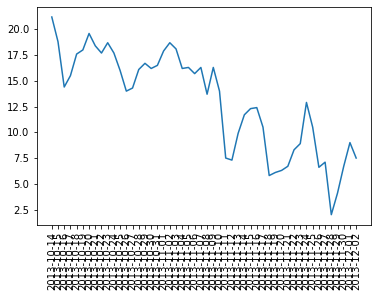

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['날짜'][40000:40050], df['평균기온(℃)'][40000:40050])
plt.xticks(df['날짜'][40000:40050], rotation=90)
plt.show()

> 2000년 이후 3월 1일 이후 최고/최저기온 확인

- 연도 월 일 데이터 분리하기

In [14]:
df['연도'] = df['날짜'].apply(lambda x : x.split('-')[0])
df['월'] = df['날짜'].apply(lambda x : x.split('-')[1])
df['일'] = df['날짜'].apply(lambda x : x.split('-')[2])
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),일교차,연도,월,일
0,1904-04-09,159,11.3,7.8,16.1,8.3,1904,04,09
1,1904-04-10,159,9.3,4.7,15.2,10.5,1904,04,10
2,1904-04-11,159,10.6,NaN,14.9,NaN,1904,04,11
3,1904-04-12,159,11.3,8.8,13.4,4.6,1904,04,12
4,1904-04-13,159,14.5,11.1,16.9,5.8,1904,04,13


In [15]:
year = df[df['연도']>='2000']['연도'].unique()


In [16]:
ticks = range(len(year))
print(year)
print(ticks)

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']
range(0, 23)


In [18]:
최고기온 = df[
    (df['연도'] >='2000')&
    (df['월'] == '03')&
    (df['일'] == '01')]['최고기온(℃)']
최고기온.index=ticks

In [19]:
최고기온

0     12.1
1     11.9
2     15.1
3      8.6
4     10.0
5      9.4
6      6.4
7     14.5
8     13.4
9     13.6
10     9.9
11     9.7
12    12.5
13    14.2
14    11.4
15     9.6
16     7.7
17    13.8
18    12.0
19    16.1
20    15.6
21    15.5
22    15.0
Name: 최고기온(℃), dtype: float64

In [21]:
최저기온 = df[(df['연도'] >='2000')&
            (df['월'] == '03')&
           (df['일'] == '01')]['최저기온(℃)']
최저기온.index=ticks

In [22]:
최저기온

0     1.0
1     6.0
2     6.8
3     5.7
4     4.5
5    -0.1
6     0.4
7     4.7
8     2.1
9     5.9
10    5.5
11    2.5
12    6.2
13    1.1
14    8.0
15    2.2
16   -4.3
17    6.2
18    2.7
19    7.0
20    7.2
21    5.2
22    8.3
Name: 최저기온(℃), dtype: float64

C:\Users\82102\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


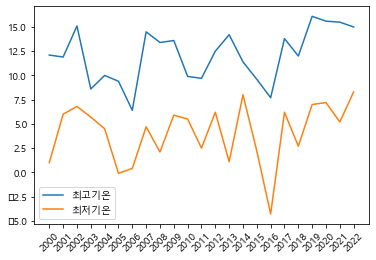

In [23]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] # False

plt.plot(최고기온, label = '최고기온')
plt.plot(최저기온, label = '최저기온')
plt.xticks(ticks, year, rotation=45)
plt.legend()
plt.show()

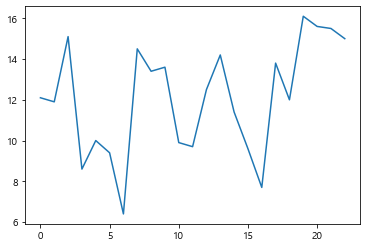

In [47]:
plt.plot(최고기온, label = '최고기온')


> 연도별 평균기온

연도
1904    16.880524
1905    13.973151
1906    13.076438
1907    13.579178
1908    13.347814
          ...    
2018    15.115068
2019    15.751507
2020    15.205464
2021    15.771233
2022    10.632680
Name: 평균기온(℃), Length: 119, dtype: float64


<AxesSubplot:xlabel='연도'>

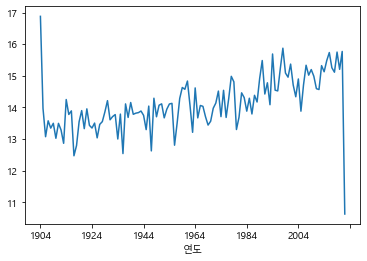

In [48]:
df_group = df.groupby('연도')['평균기온(℃)'].mean()
print(df_group)
df_group.plot()

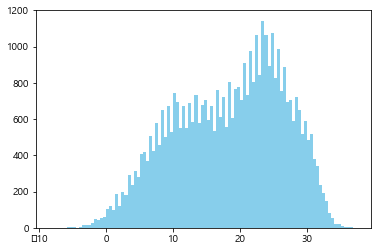

In [53]:
import matplotlib.pyplot as plt
plt.hist(df['최고기온(℃)'], bins=100, color = 'skyblue')
plt.show()

### 인구 공공데이터

In [50]:
df = pd.read_csv('C:/STUDY/StudyPandas/data/people_202101.csv', encoding='cp949', thousands=',')
df.head()

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,...,2021년01월_계_91세,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상
0,서울특별시 (1100000000),9657969,9657969,44249,49910,52741,56732,63560,68419,67870,...,8394,6867,5185,3741,2719,1998,1956,1495,1070,6853
1,서울특별시 종로구 (1111000000),149125,149125,464,588,564,663,761,841,833,...,194,164,123,105,83,57,54,58,44,276
2,서울특별시 종로구 청운효자동(1111051500),12426,12426,47,60,65,77,71,104,91,...,15,11,7,6,10,3,6,6,1,20
3,서울특별시 종로구 사직동(1111053000),9544,9544,27,37,33,54,69,64,82,...,22,15,12,6,9,4,4,6,2,21
4,서울특별시 종로구 삼청동(1111054000),2613,2613,7,7,6,16,3,17,7,...,7,4,3,3,1,3,0,2,0,6


In [51]:
df2 = df[df['행정구역']=='서울특별시 관악구 신림동(1162069500)']
df2

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,...,2021년01월_계_91세,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상
355,서울특별시 관악구 신림동(1162069500),21831,21831,42,43,29,47,39,37,40,...,10,8,6,5,3,1,1,1,3,16


In [52]:
df['행정구역_시'] = df['행정구역'].apply(lambda x: x.split(' ')[0])

In [29]:
df.head()

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,...,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상,행정구역_시
0,서울특별시 (1100000000),9657969,9657969,44249,49910,52741,56732,63560,68419,67870,...,6867,5185,3741,2719,1998,1956,1495,1070,6853,서울특별시
1,서울특별시 종로구 (1111000000),149125,149125,464,588,564,663,761,841,833,...,164,123,105,83,57,54,58,44,276,서울특별시
2,서울특별시 종로구 청운효자동(1111051500),12426,12426,47,60,65,77,71,104,91,...,11,7,6,10,3,6,6,1,20,서울특별시
3,서울특별시 종로구 사직동(1111053000),9544,9544,27,37,33,54,69,64,82,...,15,12,6,9,4,4,6,2,21,서울특별시
4,서울특별시 종로구 삼청동(1111054000),2613,2613,7,7,6,16,3,17,7,...,4,3,3,1,3,0,2,0,6,서울특별시


In [53]:
df[df['행정구역_시'] == '부산광역시']

,행정구역,2021년01월_계_총인구수,2021년01월_계_연령구간인구수,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,...,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상,행정구역_시
451,부산광역시 (2600000000),3389388,3389388,14305,17113,19108,21366,24298,26450,26265,...,2591,1945,1189,939,663,559,454,297,1901,부산광역시
452,부산광역시 중구 (2611000000),41549,41549,75,85,107,127,128,152,147,...,72,52,29,21,13,17,22,11,87,부산광역시
453,부산광역시 중구 중앙동(2611051000),2518,2518,3,6,3,5,5,1,3,...,8,1,1,2,1,1,3,1,3,부산광역시
454,부산광역시 중구 동광동(2611052000),2888,2888,6,5,6,10,8,8,5,...,11,3,6,4,1,1,4,0,5,부산광역시
455,부산광역시 중구 대청동(2611053000),6505,6505,7,13,14,17,21,23,28,...,16,11,8,3,2,4,2,1,9,부산광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,부산광역시 기장군 기장읍(2671025000),53060,53060,214,231,263,332,341,324,326,...,41,45,27,28,12,12,8,8,20,부산광역시
669,부산광역시 기장군 장안읍(2671025300),8663,8663,50,36,32,40,31,33,50,...,10,12,5,6,5,5,5,1,11,부산광역시
670,부산광역시 기장군 정관읍(2671025600),81877,81877,659,767,912,1074,1314,1402,1520,...,27,26,19,19,7,7,4,1,5,부산광역시
671,부산광역시 기장군 일광면(2671031000),23776,23776,241,304,314,321,355,337,335,...,17,9,7,8,6,2,5,3,6,부산광역시


- 불필요 컬럼 삭제

In [55]:
df2.drop(['행정구역', '2021년01월_계_총인구수', '2021년01월_계_연령구간인구수'], axis=1, inplace=True)
df2

C:\Users\82102\AppData\Local\Temp\ipykernel_5876\1510576746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['행정구역', '2021년01월_계_총인구수', '2021년01월_계_연령구간인구수'], axis=1, inplace=True)


,2021년01월_계_0세,2021년01월_계_1세,2021년01월_계_2세,2021년01월_계_3세,2021년01월_계_4세,2021년01월_계_5세,2021년01월_계_6세,2021년01월_계_7세,2021년01월_계_8세,2021년01월_계_9세,...,2021년01월_계_91세,2021년01월_계_92세,2021년01월_계_93세,2021년01월_계_94세,2021년01월_계_95세,2021년01월_계_96세,2021년01월_계_97세,2021년01월_계_98세,2021년01월_계_99세,2021년01월_계_100세 이상
355,42,43,29,47,39,37,40,21,29,32,...,10,8,6,5,3,1,1,1,3,16


In [56]:
df3 = df2.melt()
df3.drop('variable', axis=1, inplace=True)
df3

,value
0,42
1,43
2,29
3,47
4,39
...,...
96,1
97,1
98,1
99,3


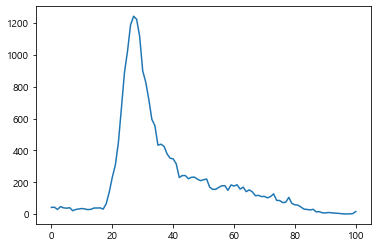

In [57]:
import matplotlib.pyplot as plt
plt.plot(df3)

<BarContainer object of 101 artists>

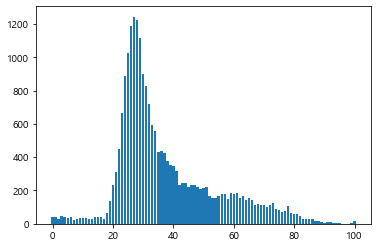

In [58]:
plt.bar(df3.index, df3.value)

### 2021년 1월 성별 / 연령별 인구 현황 데이터 가져오기

In [124]:
df = pd.read_csv('C:/STUDY/StudyPandas/data/people_gender_202101.csv', encoding='cp949',thousands=',')

In [125]:
df

,행정구역,2021년01월_남_총인구수,2021년01월_남_연령구간인구수,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,...,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
0,서울특별시 (1100000000),4695999,4695999,317563,399754,704862,735813,755311,748598,590203,...,379156,750182,735793,769360,774385,659895,384751,170791,31697,5026
1,서울특별시 종로구 (1111000000),72528,72528,3767,5443,11493,9883,10800,12765,9979,...,5494,11838,10034,11332,12645,10090,6990,3582,731,179
2,서울특별시 종로구 청운효자동(1111051500),5784,5784,430,618,795,772,969,922,620,...,547,795,911,1179,1059,775,605,311,50,17
3,서울특별시 종로구 사직동(1111053000),4273,4273,290,306,568,619,668,695,567,...,386,667,822,824,856,645,446,264,58,15
4,서울특별시 종로구 삼청동(1111054000),1251,1251,47,108,164,170,179,202,187,...,80,146,183,188,209,221,153,102,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,제주특별자치도 서귀포시 서홍동(5013058000),5313,5313,603,697,659,573,962,851,538,...,711,575,661,953,751,587,387,179,27,2
3842,제주특별자치도 서귀포시 대륜동(5013059000),7515,7515,821,709,815,1073,1351,1161,924,...,609,735,1086,1179,1087,969,593,290,60,6
3843,제주특별자치도 서귀포시 대천동(5013060000),7083,7083,866,685,748,1072,1335,1079,761,...,582,705,1148,1112,953,765,439,264,55,3
3844,제주특별자치도 서귀포시 중문동(5013061000),5946,5946,497,584,694,797,1101,1027,682,...,568,637,739,894,862,631,438,311,51,6


In [127]:
df2 = df[df['행정구역']=='서울특별시 관악구 신림동(1162069500)']

In [128]:
df2

,행정구역,2021년01월_남_총인구수,2021년01월_남_연령구간인구수,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,...,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
355,서울특별시 관악구 신림동(1162069500),11398,11398,178,231,4032,3247,1425,999,695,...,243,4304,2378,1066,773,767,497,173,36,15


In [129]:
df2.drop(['행정구역', '2021년01월_남_총인구수','2021년01월_여_총인구수', '2021년01월_남_연령구간인구수','2021년01월_여_연령구간인구수'], axis=1, inplace=True)

C:\Users\82102\AppData\Local\Temp\ipykernel_5876\2493924102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['행정구역', '2021년01월_남_총인구수','2021년01월_여_총인구수', '2021년01월_남_연령구간인구수','2021년01월_여_연령구간인구수'], axis=1, inplace=True)


In [130]:
df2

,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,2021년01월_남_70~79세,2021년01월_남_80~89세,2021년01월_남_90~99세,...,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
355,178,231,4032,3247,1425,999,695,443,138,9,...,243,4304,2378,1066,773,767,497,173,36,15


> 남자 데이터 확인

In [131]:
male = df2.iloc[:, 0:11]
male

,2021년01월_남_0~9세,2021년01월_남_10~19세,2021년01월_남_20~29세,2021년01월_남_30~39세,2021년01월_남_40~49세,2021년01월_남_50~59세,2021년01월_남_60~69세,2021년01월_남_70~79세,2021년01월_남_80~89세,2021년01월_남_90~99세,2021년01월_남_100세 이상
355,178,231,4032,3247,1425,999,695,443,138,9,1


In [132]:
male2 = male.melt()
male2.drop('variable', axis=1, inplace=True)
male2 = male2 * -1


스칼라 연산을 하기 위해서는 int 값이어어야 하는데 
주어진 데이터에서 천단위 구분자 ,때문에 string으로 인식해서 스칼라 연산이 안되었다
데이터를 불러올때 thousands=',' 처리해서 값을 불러오면 int값으로 불러올수 있다 
이후에 스칼라 연산이 가능하다

In [133]:
male2

,value
0,-178
1,-231
2,-4032
3,-3247
4,-1425
5,-999
6,-695
7,-443
8,-138
9,-9


> 여자 데이터확인

In [138]:
female = df2.iloc[:,11:]
female

,2021년01월_여_0~9세,2021년01월_여_10~19세,2021년01월_여_20~29세,2021년01월_여_30~39세,2021년01월_여_40~49세,2021년01월_여_50~59세,2021년01월_여_60~69세,2021년01월_여_70~79세,2021년01월_여_80~89세,2021년01월_여_90~99세,2021년01월_여_100세 이상
355,181,243,4304,2378,1066,773,767,497,173,36,15


In [139]:
female2 = female.melt()
female2.drop('variable', axis=1, inplace=True)
female2

,value
0,181
1,243
2,4304
3,2378
4,1066
5,773
6,767
7,497
8,173
9,36


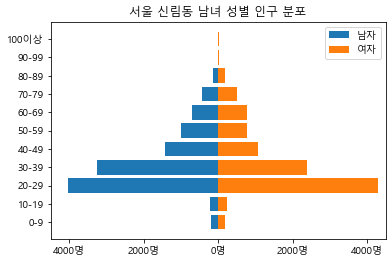

In [140]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False
plt.title('서울 신림동 남녀 성별 인구 분포')
plt.barh(range(11), male2['value'].tolist(), label = '남자')
plt.barh(range(11), female2['value'].tolist(), label='여자')
plt.yticks(
    range(11),
    ['0-9', '10-19','20-29', '30-39','40-49','50-59','60-69','70-79','80-89','90-99','100이상'])
plt.xlim(-4500,4500)
plt.xticks(
    range(-4000, 4001,2000),
    ['4000명','2000명','0명','2000명','4000명'])
plt.legend()
plt.show()

### 대중교통 통계자료

In [1]:
import pandas as pd
df = pd.read_csv('C:/STUDY/StudyPandas/data/subway_202101.csv', thousands=',')
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34


In [2]:
df['무임승차비율']=df['무임승차']/(df['무임승차']+df['유임승차'])
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,무임승차비율
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34,0.148434
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34,0.535928
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34,0.110555
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34,0.123800
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34,0.374049
...,...,...,...,...,...,...,...,...,...,...
599,2021-01,우이신설선,705,북한산보국문,99921,97636,28310,29192,2021-02-03 09:49:34,0.220773
600,2021-01,우이신설선,706,정릉,67390,63786,30469,29394,2021-02-03 09:49:34,0.311356
601,2021-01,우이신설선,707,성신여대입구(돈암),50177,58328,19635,18769,2021-02-03 09:49:34,0.281255
602,2021-01,우이신설선,708,보문,22999,23078,10301,10532,2021-02-03 09:49:34,0.309339


- 무임승차 비율이 가장 높은 역 전체 현황 확인

In [3]:
df[df['무임승차비율']==df['무임승차비율'].max()].iloc[0,4:8]

유임승차    21105
유임하차    16051
무임승차    38785
무임하차    35334
Name: 208, dtype: object

유임 승차 비율 = (유임승차 / 전체 승,하차 횟수) * 100

In [6]:
station = df[df['무임승차비율'] == df['무임승차비율'].max()]
유임승차 = station['유임승차']
유임하차 = station['유임하차']
무임승차 = station['무임승차']
무임하차 = station['무임하차']
total = df[
    df['무임승차비율'] == df['무임승차비율'].max()
].iloc[0,4:8].sum(axis=0)
print(total)

111275


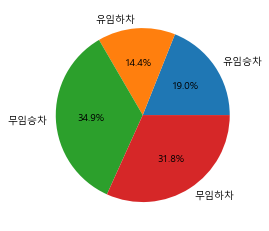

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.pie(
    [
        유임승차.sum() / total*100, 유임하차.sum()/total*100,
        무임승차.sum() / total*100, 무임하차.sum()/total*100
    ],
    labels=['유임승차','유임하차','무임승차','무임하차'],
    autopct='%.1f%%')
plt.show()


- 07-10시 가장 많은 사람이 타고 내리는 역

In [8]:
import pandas as pd

In [13]:
columns = pd.read_csv('C:/STUDY/StudyPandas/data/subway_2_202101.csv').columns

In [11]:
# 첫번째 행을 날리고 구분자 , 제거 해줘야 int 값으로 불러올수 있다 
df = pd.read_csv('C:/STUDY/StudyPandas/data/subway_2_202101.csv',thousands=',',skiprows=1)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,...,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23,Unnamed: 52
0,2021-01,1호선,1,서울역,445,8,6832,4781,8835,24937,...,3751,32,398,0,2,0,0,0,0,2021-02-03 09:49:40
1,2021-01,1호선,10,동묘앞,78,2,2391,738,2761,3527,...,1502,1,704,0,8,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,2,시청,18,1,1489,2990,2235,14570,...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,3,종각,113,1,1852,3464,2578,18288,...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,4,종로3가,109,4,2187,2427,2374,8473,...,1104,7,194,0,3,0,0,0,0,2021-02-03 09:49:40


In [15]:
# columns명을 다시 위에 붙여준다 
df.columns = columns 
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,2021-01,1호선,1,서울역,445,8,6832,4781,8835,24937,...,3751,32,398,0,2,0,0,0,0,2021-02-03 09:49:40
1,2021-01,1호선,10,동묘앞,78,2,2391,738,2761,3527,...,1502,1,704,0,8,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,2,시청,18,1,1489,2990,2235,14570,...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,3,종각,113,1,1852,3464,2578,18288,...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,4,종로3가,109,4,2187,2427,2374,8473,...,1104,7,194,0,3,0,0,0,0,2021-02-03 09:49:40


In [17]:
# 7 ~ 10시까지 승하차 데이터 
df2=df.iloc[:,[3,10,11,12,13,14,15,16,17]]
df2.head()

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013
2,시청,4971,47793,6119,131340,6335,62133,7012,23760
3,종각,4413,77560,6631,165202,7997,100421,10911,42055
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285


In [18]:
df2['출근'] = df2.iloc[:,1:].sum(axis=1)
df2.head()

C:\Users\82102\AppData\Local\Temp\ipykernel_8680\2633952813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['출근'] = df2.iloc[:,1:].sum(axis=1)


,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874,480211
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013,71251
2,시청,4971,47793,6119,131340,6335,62133,7012,23760,289463
3,종각,4413,77560,6631,165202,7997,100421,10911,42055,415190
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285,196659


In [19]:
df3 = df2.sort_values(by='출근',ascending=False)
df3.head()

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
31,강남,29652,120313,46525,260062,37172,253781,37419,121344,906268
41,구로디지털단지,111142,69658,154198,211123,92286,127296,51478,48906,866087
39,신림,169189,26855,259505,50025,152632,42542,76710,35268,812726
508,가산디지털단지,17159,105504,20214,343504,13738,198778,13331,53880,766108
30,역삼,11073,105499,19280,267827,18175,218403,17670,82553,740480


In [24]:
mx = df.iloc[:, range(4,52,2)].max(axis=0).tolist()
print(mx)

[7312, 32431, 62867, 169189, 259505, 152632, 76710, 64159, 66910, 74938, 86107, 111104, 125759, 190350, 283331, 177478, 159575, 189419, 43747, 11496, 496, 3, 5, 0]


In [34]:
mx_station=[]
for i, e in enumerate(mx):
    if e:
    mx_station.append('%s (%s)'
                    %(df[df.iloc[:,i*2+4]==e]['지하철역'].iloc[0],i+4))


IndentationError: expected an indented block (2329337366.py, line 4)

In [35]:
df[df.iloc[:,4]==7312['지하철역'].iloc[0]

SyntaxError: unexpected EOF while parsing (1385035840.py, line 1)

In [ ]:
len(mx),(len(mx_station))

In [ ]:
# 마지막거 하나 자르기 한번만 실행해야
mx.pop() 

In [28]:
import matplotlib.pyplot as plt
plt.rc('font', family ='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(range(len(mx_station)), mx, color ='blue')
plt.xticks(range(len(mx_station)), mx_station, rotation=90)
plt.show()

NameError: name 'mx_station' is not defined